In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import datetime
import os

import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras import layers, models
from tensorflow.keras.layers import LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.regularizers import l1, l2, l1_l2
from keras.layers.normalization import BatchNormalization

In [2]:
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

In [3]:
tf.config.experimental.list_physical_devices('GPU')


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
#tf.keras.preprocessing.image_dataset_from_directory( "C:\\Users\\adhim\\Desktop\\Compressed_Segmented\\Train",
                                                      labels = "inferred",
                                                      label_mode = "int",
                                                      class_names = None,
                                                      color_mode = "rgb",
                                                      batch_size = 32,
                                                      image_size = (250, 250),
                                                      shuffle = True,
                                                      seed = None,
                                                      validation_split = None,
                                                      subset = None,
                                                      interpolation = "bilinear",
                                                      follow_links = False)

IndentationError: unexpected indent (<ipython-input-3-3c134b058e07>, line 2)

In [4]:
tf.data.Dataset

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [92]:
#tf.keras.preprocessing.image.load_img("C:\\Users\\adhim\\Desktop\\Compressed_Segmented\\Train\\DarkSpoted\\1.jpg",
                                       grayscale = False,
                                       color_mode = "rgb",
                                       target_size = None,
                                       interpolation = "nearest")

IndentationError: unexpected indent (<ipython-input-92-87b7c8710186>, line 2)

## Flow from Directory

In [4]:
Datagen= tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1./25,
                                                          shear_range = 0.2,
                                                          zoom_range = 0.2,
                                                          horizontal_flip = True,
                                                          vertical_flip = True,
                                                          rotation_range = 10,
                                                          #width_shift_range = 0.2,
                                                          #height_shift_range = 0.2,
                                                          #brightness_range = [0.2, 1.2]
                                                               )

In [5]:
train_generator = Datagen.flow_from_directory( 
                                                     "C:\\Users\\adhim\\Desktop\\Compressed_Segmented1\\Train",
                                                     target_size = (250, 250),
                                                     batch_size = 32,
                                                     class_mode = "binary"
                                                    )

Found 374 images belonging to 3 classes.


In [6]:
validation_generator = Datagen.flow_from_directory( "C:\\Users\\adhim\\Desktop\\Compressed_Segmented1\\Validation",
                                                          target_size = (250, 250),
                                                         batch_size = 32,
                                                         class_mode = "binary"
                                                         )

Found 146 images belonging to 3 classes.


# Models for  Threshold Segmented Images

## Model 1

In [7]:
leaky_relu_alpha = 0.1

In [8]:
model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), input_shape = (250, 250, 3)))

model.add(LeakyReLU( alpha = leaky_relu_alpha))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3)))

model.add(LeakyReLU( alpha = leaky_relu_alpha))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dropout(0.25))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 64)      1792      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 248, 248, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 124, 124, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 128)     73856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 122, 122, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 128)       0

In [10]:
model.add(layers.Flatten())

model.add(layers.Dense(256, activation = "relu"))

model.add(layers.Dense(128, activation = "relu"))

model.add(LeakyReLU( alpha = leaky_relu_alpha))

model.add(layers.Dense(2, activation = "softmax"))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 64)      1792      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 248, 248, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 124, 124, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 128)     73856     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 122, 122, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 128)       0

In [12]:
model.compile( optimizer = "adam",
               loss = tf.keras.losses.mean_squared_error,
               metrics = ['accuracy'])

In [13]:
history = model.fit( train_generator,
                     epochs = 10,
                     batch_size = 32,
                     validation_data = validation_generator)

Epoch 1/10


ResourceExhaustedError:  OOM when allocating tensor with shape[476288,256] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node gradient_tape/sequential/dense/MatMul_1 (defined at <ipython-input-13-20bc0788f28e>:1) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_986]

Function call stack:
train_function


## Predefined Model

In [14]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [15]:
train_dataset = image_dataset_from_directory("C:\\Users\\adhim\\Desktop\\Compressed_Segmented1\\Train",
                                          image_size = (224, 224),
                                          batch_size = 32,
                                          shuffle = True
                                          )                                         

Found 374 files belonging to 4 classes.


In [16]:
val_dataset = image_dataset_from_directory( "C:\\Users\\adhim\\Desktop\\Compressed_Segmented1\\Validation",
                                                image_size = (224, 224),
                                                batch_size = 32,
                                                shuffle = True)

Found 156 files belonging to 4 classes.


In [7]:
data_augmentation = tf.keras.Sequential([
    
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

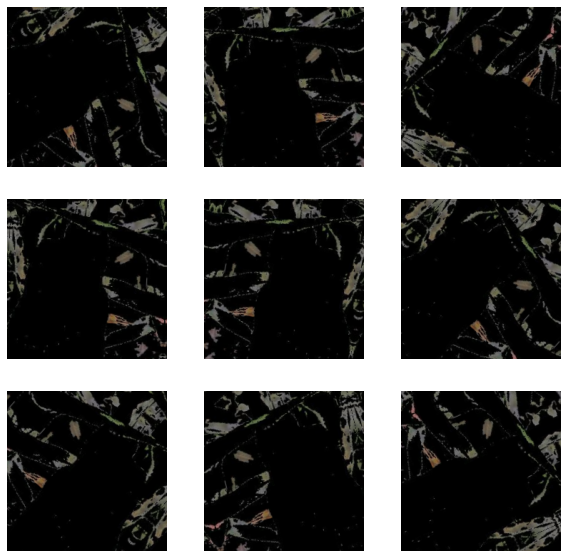

In [6]:
class_name = train_dataset.class_names

for images,_ in train_dataset.take(1):
    plt.figure( figsize = (10, 10) )
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation( tf.expand_dims( first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')
        

In [8]:
preprocess_input = tf.keras.applications.resnet.preprocess_input

In [9]:
# Create a base model from ResNet pre trained model

IMG_SHAPE = (224, 244) + (3,)
base_model = tf.keras.applications.ResNet50(input_shape = IMG_SHAPE,
                                            include_top = False,
                                            weights = 'imagenet')

In [10]:
image_batch, label_batch = next(iter(train_dataset))

feature_batch = base_model(image_batch)

In [11]:
# Freeze the base convolutional base

base_model.trainable = False

In [12]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 244, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 250, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 122, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 122, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [13]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

feature_batch_average = global_average_layer(feature_batch)

In [14]:
prediction_layer = layers.Dense(1)

prediction_batch = prediction_layer(feature_batch_average)

In [16]:
inputs = tf.keras.Input( shape = (224, 224, 3))

x = data_augmentation(inputs)

x = preprocess_input(x)

x = base_model(x, training = False)

x = global_average_layer(x)

x = layers.Dropout(0.2)(x)

outputs = prediction_layer(x)

In [17]:
model = tf.keras.Model(inputs, outputs)

In [22]:
base_learning_rate = 0.0001

model.compile( optimizer = tf.keras.optimizers.Adam(lr = base_learning_rate),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy']
             )

In [25]:
intial_epochs = 20

loss0, accuracy0 = model.evaluate(val_dataset)

4/4 [==============================] - 0s 73ms/step - loss: 0.6557 - accuracy: 0.6905


In [26]:
history = model.fit(train_dataset, epochs = intial_epochs, validation_data = val_dataset)

Epoch 1/20
10/10 [==============================] - 1s 150ms/step - loss: 0.4677 - accuracy: 0.7919 - val_loss: 0.6301 - val_accuracy: 0.7302
Epoch 2/20
10/10 [==============================] - 1s 149ms/step - loss: 0.4397 - accuracy: 0.7752 - val_loss: 0.6403 - val_accuracy: 0.7143
Epoch 3/20
10/10 [==============================] - 1s 149ms/step - loss: 0.4290 - accuracy: 0.8121 - val_loss: 0.6502 - val_accuracy: 0.6984
Epoch 4/20
10/10 [==============================] - 1s 149ms/step - loss: 0.4204 - accuracy: 0.8322 - val_loss: 0.6450 - val_accuracy: 0.7143
Epoch 5/20
10/10 [==============================] - 1s 149ms/step - loss: 0.4236 - accuracy: 0.8154 - val_loss: 0.6492 - val_accuracy: 0.6905
Epoch 6/20
10/10 [==============================] - 1s 149ms/step - loss: 0.3876 - accuracy: 0.8423 - val_loss: 0.6496 - val_accuracy: 0.6984
Epoch 7/20
10/10 [==============================] - 1s 149ms/step - loss: 0.3915 - accuracy: 0.8456 - val_loss: 0.6492 - val_accuracy: 0.7063
Epoch 

## Model 2

In [17]:
model1 = models.Sequential()

model1.add(layers.Conv2D(filters = 16, kernel_size = (3, 3), kernel_regularizer = l2(0.01), padding = 'same'))
           
model1.add(LeakyReLU( alpha = leaky_relu_alpha))

model1.add(layers.MaxPooling2D( pool_size = 2, strides = 2))

model1.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), kernel_regularizer = l2(0.01), padding = "same"))
           
model1.add(LeakyReLU( alpha = leaky_relu_alpha ))

model1.add(layers.MaxPooling2D(pool_size = 2, strides = 2 ))

model1.add(layers.Conv2D(filters = 64, kernel_size = (3, 3), kernel_regularizer = l2(0.01), padding = "same"))

model1.add(LeakyReLU( alpha = leaky_relu_alpha ))

model1.add(layers.MaxPooling2D(pool_size = 2, strides = 2 ))

In [18]:
#model1.summary()

In [20]:
model1.add(layers.Flatten())

model1.add(layers.Dense(64,  kernel_regularizer = l2(0.01)))

model1.add(LeakyReLU( alpha = leaky_relu_alpha ))

model1.add(layers.Dense(32, kernel_regularizer = l2(0.01)))

model1.add(LeakyReLU( alpha = leaky_relu_alpha ))

model1.add(layers.Dense(16, kernel_regularizer = l2(0.01)))

model1.add(LeakyReLU( alpha = leaky_relu_alpha ))

model1.add(layers.Dense(4, activation = "softmax"))

In [21]:
checkpoint_path = 'training_0/cp.ckpt'

checkpoint_dir = os.path.dirname(checkpoint_path)

In [22]:
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                 #save_weights_only = True,
                                                 #verbose = 1)

In [23]:
#adam = Adam( lr = 5e-4 )

model1.compile(loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'],
               optimizer = "adam")

In [24]:
history = model1.fit(train_generator,
                     batch_size = 32,
                     epochs = 30,
                     validation_data = validation_generator
                     )

Epoch 1/30
12/12 [==============================] - 7s 586ms/step - loss: 4.4418 - accuracy: 0.5214 - val_loss: 3.7201 - val_accuracy: 0.4863
Epoch 2/30
12/12 [==============================] - 6s 523ms/step - loss: 3.3374 - accuracy: 0.6417 - val_loss: 3.4440 - val_accuracy: 0.5342
Epoch 3/30
12/12 [==============================] - 6s 525ms/step - loss: 2.9439 - accuracy: 0.6979 - val_loss: 2.9164 - val_accuracy: 0.5616
Epoch 4/30
12/12 [==============================] - 6s 529ms/step - loss: 2.5912 - accuracy: 0.7273 - val_loss: 2.7642 - val_accuracy: 0.5959
Epoch 5/30
12/12 [==============================] - 6s 508ms/step - loss: 2.2668 - accuracy: 0.7701 - val_loss: 2.3031 - val_accuracy: 0.6849
Epoch 6/30
12/12 [==============================] - 6s 529ms/step - loss: 2.0790 - accuracy: 0.7701 - val_loss: 2.2324 - val_accuracy: 0.7329
Epoch 7/30
12/12 [==============================] - 6s 527ms/step - loss: 1.9172 - accuracy: 0.8289 - val_loss: 2.7632 - val_accuracy: 0.6233
Epoch 

In [64]:
model1.load_weights(checkpoint_path)

In [66]:
!mkdir -p saved_model
model1.save('saved_model/jowar_model')

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file saved_model already exists.
Error occurred while processing: saved_model.


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_model/jowar_model\assets


##  Model 3

In [95]:
model2 = models.Sequential()

model2.add(layers.Conv2D( filters = 6, kernel_size = 5, padding = "same", activation = 'tanh', input_shape = (250, 250, 3)))

model2.add(layers.AvgPool2D( pool_size = 2, strides = 2))

model2.add(layers.Conv2D( filters = 16, kernel_size = 5, padding = "valid", activation = 'tanh'))

model2.add(layers.AvgPool2D( pool_size = 2, strides = 2))

In [96]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 250, 250, 6)       456       
_________________________________________________________________
average_pooling2d_6 (Average (None, 125, 125, 6)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 121, 121, 16)      2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 60, 60, 16)        0         
Total params: 2,872
Trainable params: 2,872
Non-trainable params: 0
_________________________________________________________________


In [97]:
model2.add(layers.Flatten())

model2.add(layers.Dense( 120, activation = 'tanh'))

model2.add(layers.Dense( 84, activation = 'softmax'))

model2.add(layers.Dense(3))

In [98]:
model2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 250, 250, 6)       456       
_________________________________________________________________
average_pooling2d_6 (Average (None, 125, 125, 6)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 121, 121, 16)      2416      
_________________________________________________________________
average_pooling2d_7 (Average (None, 60, 60, 16)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 57600)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 120)               6912120   
_________________________________________________________________
dense_30 (Dense)             (None, 84)              

In [99]:
adam = Adam( lr = 5e-4 )

model2.compile( loss = 'sparse_categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [100]:
model2.fit( train_generator, validation_data = validation_generator, epochs = 10)

Epoch 1/10
7/7 [==============================] - 4s 502ms/step - loss: 1.5423 - accuracy: 0.5488 - val_loss: 1.5787 - val_accuracy: 0.6937
Epoch 2/10
7/7 [==============================] - 3s 426ms/step - loss: 1.0066 - accuracy: 0.7163 - val_loss: 1.5480 - val_accuracy: 0.6667
Epoch 3/10
7/7 [==============================] - 3s 426ms/step - loss: 1.3680 - accuracy: 0.7070 - val_loss: 1.3178 - val_accuracy: 0.6667
Epoch 4/10
7/7 [==============================] - 3s 448ms/step - loss: 1.0562 - accuracy: 0.6837 - val_loss: 1.2325 - val_accuracy: 0.6937
Epoch 5/10
7/7 [==============================] - 3s 427ms/step - loss: 1.0825 - accuracy: 0.6930 - val_loss: 1.0671 - val_accuracy: 0.6126
Epoch 6/10
7/7 [==============================] - 3s 427ms/step - loss: 1.0942 - accuracy: 0.6326 - val_loss: 1.1091 - val_accuracy: 0.5856
Epoch 7/10
7/7 [==============================] - 3s 428ms/step - loss: 0.8455 - accuracy: 0.6512 - val_loss: 1.1748 - val_accuracy: 0.5856
Epoch 8/10
7/7 [====

## Model 4

In [58]:
model_AI = models.Sequential()

model_AI.add(layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (250, 250, 3)))

model_AI.add(BatchNormalization())

model_AI.add(layers.MaxPool2D(pool_size = (3, 3)))

model_AI.add(layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'))

model_AI.add(BatchNormalization())

model_AI.add(layers.MaxPool2D(pool_size = (2, 2)))

model_AI.add(layers.Dropout(0.25))

model_AI.add(layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'))

model_AI.add(BatchNormalization())

model_AI.add(layers.MaxPool2D(pool_size = (2, 2)))

model_AI.add(layers.Dropout(0.25))

In [59]:
model_AI.add(layers.Flatten())

model_AI.add(layers.Dense(1024, activation = 'relu'))

model_AI.add(BatchNormalization())

model_AI.add(layers.Dropout(0.25))

model_AI.add(layers.Dense(2, activation = 'softmax'))

In [60]:
model_AI.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 250, 250, 32)      896       
_________________________________________________________________
batch_normalization_3 (Batch (None, 250, 250, 32)      128       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 83, 83, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 83, 83, 64)        18496     
_________________________________________________________________
batch_normalization_4 (Batch (None, 83, 83, 64)        256       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 41, 41, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 41, 41, 64)       

In [75]:
model_AI.compile( loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [76]:
model_AI.fit( train_generator, validation_data = validation_generator, epochs = 20)

Epoch 1/20
10/10 [==============================] - 4s 419ms/step - loss: 3.1615 - accuracy: 0.4698 - val_loss: 1.6963 - val_accuracy: 0.6429
Epoch 2/20
10/10 [==============================] - 4s 393ms/step - loss: 1.3040 - accuracy: 0.4732 - val_loss: 0.8761 - val_accuracy: 0.5794
Epoch 3/20
10/10 [==============================] - 4s 393ms/step - loss: 0.9351 - accuracy: 0.4933 - val_loss: 0.8752 - val_accuracy: 0.6825
Epoch 4/20
10/10 [==============================] - 4s 390ms/step - loss: 0.8213 - accuracy: 0.5503 - val_loss: 0.7979 - val_accuracy: 0.5476
Epoch 5/20
10/10 [==============================] - 4s 392ms/step - loss: 0.7745 - accuracy: 0.5268 - val_loss: 0.9354 - val_accuracy: 0.4444
Epoch 6/20
10/10 [==============================] - 4s 389ms/step - loss: 0.7572 - accuracy: 0.4832 - val_loss: 1.0132 - val_accuracy: 0.5873
Epoch 7/20
10/10 [==============================] - 4s 395ms/step - loss: 0.7378 - accuracy: 0.4866 - val_loss: 1.3425 - val_accuracy: 0.6190
Epoch 

## Model 5

In [41]:
model_5 = models.Sequential()

model_5.add(layers.Conv2D(32, (3, 3), input_shape = (250, 250, 3)))

model_5.add( LeakyReLU( alpha = leaky_relu_alpha ))

model_5.add(layers.MaxPooling2D( (2, 2) ))

model_5.add(layers.Conv2D(64, (3, 3)))

model_5.add( LeakyReLU( alpha = leaky_relu_alpha ))

model_5.add(layers.MaxPooling2D( (2, 2) ))

model_5.add(layers.Conv2D(128, (3, 3)))

model_5.add( LeakyReLU( alpha = leaky_relu_alpha ))

model_5.add(layers.MaxPooling2D( (2, 2) ))

model_5.add(layers.Conv2D(128, (3, 3)))

model_5.add( LeakyReLU( alpha = leaky_relu_alpha ))

In [42]:
model_5.add(layers.Flatten())

model_5.add(layers.Dense(128, activation = 'relu'))

model_5.add(layers.Dense(64, activation = 'relu'))

model_5.add(layers.Dense(2))

In [45]:
model_5.compile( optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [46]:
model_5.fit( train_generator, validation_data = validation_generator, epochs = 10, batch_size = 32)

Epoch 1/10
10/10 [==============================] - 7s 653ms/step - loss: 3.5820 - accuracy: 0.7651 - val_loss: 6.6564 - val_accuracy: 0.5635
Epoch 2/10
10/10 [==============================] - 6s 574ms/step - loss: 3.5820 - accuracy: 0.7651 - val_loss: 6.6564 - val_accuracy: 0.5635
Epoch 3/10
10/10 [==============================] - 6s 583ms/step - loss: 3.5820 - accuracy: 0.7651 - val_loss: 6.6564 - val_accuracy: 0.5635
Epoch 4/10
10/10 [==============================] - 6s 590ms/step - loss: 3.5820 - accuracy: 0.7651 - val_loss: 6.6564 - val_accuracy: 0.5635
Epoch 5/10
10/10 [==============================] - 6s 582ms/step - loss: 3.5820 - accuracy: 0.7651 - val_loss: 6.6564 - val_accuracy: 0.5635
Epoch 6/10
10/10 [==============================] - 6s 580ms/step - loss: 3.5820 - accuracy: 0.7651 - val_loss: 6.6564 - val_accuracy: 0.5635
Epoch 7/10
10/10 [==============================] - 6s 587ms/step - loss: 3.5820 - accuracy: 0.7651 - val_loss: 6.6564 - val_accuracy: 0.5635
Epoch 

KeyboardInterrupt: 

# Models for Otsu's Images

In [59]:
Otsu_Datagen= tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1./255,
                                                                 shear_range = 0.2,
                                                                 zoom_range = 0.2,
                                                                 horizontal_flip = True,
                                                                 vertical_flip = True
                                                               )

In [60]:
Otsu_train_generator = Otsu_Datagen.flow_from_directory( 
                                                     "C:\\Users\\adhim\\Desktop\\Compressed_Segmented2\\Train",
                                                     target_size = (250, 250),
                                                     batch_size = 32,
                                                     class_mode = "binary"
                                                    )

Found 304 images belonging to 2 classes.


In [61]:
Otsu_validation_generator = Otsu_Datagen.flow_from_directory( "C:\\Users\\adhim\\Desktop\\Compressed_Segmented1\\Validation",
                                                          target_size = (250, 250),
                                                         batch_size = 32,
                                                         class_mode = "binary"
                                                         )

Found 111 images belonging to 2 classes.


##  Model 4

In [62]:
leaky_relu_alpha = 0.1

In [88]:
model3 = models.Sequential()

model3.add(layers.Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', input_shape = (250, 250, 3)))

model3.add(LeakyReLU( alpha = leaky_relu_alpha))

model3.add(layers.MaxPool2D( pool_size = 2, strides = 2))

model3.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = "valid"))

model3.add(LeakyReLU( alpha = leaky_relu_alpha ))

model3.add(layers.MaxPool2D(pool_size = 2, strides = 2 ))

model3.add(layers.Conv2D(filters = 48, kernel_size = (3, 3),))

model3.add(LeakyReLU( alpha = leaky_relu_alpha ))

model3.add(layers.MaxPool2D(pool_size = 2, strides = 2 ))

In [89]:
model3.add(layers.Flatten())

model3.add(layers.Dense(256, activation = "relu"))

model3.add(layers.Dense(128, activation = "relu"))

model3.add(layers.Dense(3, activation = "softmax"))

In [90]:
model3.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 250, 250, 16)      448       
_________________________________________________________________
leaky_re_lu_51 (LeakyReLU)   (None, 250, 250, 16)      0         
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 125, 125, 16)      0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 123, 123, 32)      4640      
_________________________________________________________________
leaky_re_lu_52 (LeakyReLU)   (None, 123, 123, 32)      0         
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 59, 59, 48)      

In [91]:
model3.compile( loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer = "adam")

In [92]:
model3.fit( Otsu_train_generator, epochs = 20, validation_data = Otsu_validation_generator)

Epoch 1/20
10/10 [==============================] - 5s 547ms/step - loss: 1.8822 - accuracy: 0.5625 - val_loss: 0.8064 - val_accuracy: 0.5856
Epoch 2/20
10/10 [==============================] - 5s 517ms/step - loss: 0.7095 - accuracy: 0.6020 - val_loss: 0.7275 - val_accuracy: 0.6757
Epoch 3/20
10/10 [==============================] - 5s 489ms/step - loss: 0.6596 - accuracy: 0.6809 - val_loss: 0.7554 - val_accuracy: 0.6757
Epoch 4/20
10/10 [==============================] - 5s 484ms/step - loss: 0.6449 - accuracy: 0.6743 - val_loss: 0.7386 - val_accuracy: 0.6757
Epoch 5/20
10/10 [==============================] - 5s 486ms/step - loss: 0.6465 - accuracy: 0.6908 - val_loss: 0.7548 - val_accuracy: 0.6757
Epoch 6/20
10/10 [==============================] - 5s 492ms/step - loss: 0.6544 - accuracy: 0.6645 - val_loss: 0.7831 - val_accuracy: 0.6937
Epoch 7/20
10/10 [==============================] - 5s 525ms/step - loss: 0.6695 - accuracy: 0.6809 - val_loss: 0.7854 - val_accuracy: 0.4144
Epoch 

# Model for  Otsu  Binary Threshold Image

In [2]:
Otsu_Binary_Datagen= tf.keras.preprocessing.image.ImageDataGenerator( rescale = 1./255,
                                                                 shear_range = 0.2,
                                                                 zoom_range = 0.2,
                                                                 horizontal_flip = True,
                                                                 vertical_flip = True
                                                               )

In [4]:
Otsu_Binary_train_generator = Otsu_Binary_Datagen.flow_from_directory( 
                                                     "C:\\Users\\adhim\\Desktop\\Compressed_Segmented3\\Train",
                                                     target_size = (250, 250),
                                                     batch_size = 32,
                                                     class_mode = "binary"
                                                    )

Found 303 images belonging to 2 classes.


In [13]:
Otsu_Binary_validation_generator = Otsu_Binary_Datagen.flow_from_directory( "C:\\Users\\adhim\\Desktop\\Compressed_Segmented3\\Validation",
                                                          target_size = (250, 250),
                                                         batch_size = 32,
                                                         class_mode = "binary"
                                                         )

Found 131 images belonging to 2 classes.


##  Model 4

In [14]:
leaky_relu_alpha = 0.1

In [50]:
model4 = models.Sequential()

model4.add(layers.Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', input_shape = (250, 250, 3)))

model4.add(LeakyReLU( alpha = leaky_relu_alpha))

model4.add(layers.MaxPool2D( pool_size = 2, strides = 2))

model4.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = "valid"))

model4.add(LeakyReLU( alpha = leaky_relu_alpha ))

model4.add(layers.MaxPool2D(pool_size = 2, strides = 2 ))

model4.add(layers.Conv2D(filters = 48, kernel_size = (3, 3)))

model4.add(LeakyReLU( alpha = leaky_relu_alpha ))

model4.add(layers.MaxPool2D(pool_size = 2, strides = 2 ))

In [51]:
model4.add(layers.Flatten())

model4.add(layers.Dense(256, kernel_regularizer = l1_l2(0.001), activation = "relu"))

model4.add(layers.Dense(128, kernel_regularizer = l1_l2(0.001), activation = "relu"))

model4.add(layers.Dense(3, activation = "softmax"))

In [52]:
model4.compile( loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'], optimizer = "adam")

In [53]:
model4.fit( Otsu_Binary_train_generator, epochs = 20, validation_data = Otsu_Binary_validation_generator)

Epoch 1/20
10/10 [==============================] - 4s 440ms/step - loss: 43.3236 - accuracy: 0.6007 - val_loss: 20.4487 - val_accuracy: 0.6794
Epoch 2/20
10/10 [==============================] - 4s 415ms/step - loss: 17.1295 - accuracy: 0.6931 - val_loss: 12.8509 - val_accuracy: 0.6794
Epoch 3/20
10/10 [==============================] - 4s 401ms/step - loss: 10.2028 - accuracy: 0.6766 - val_loss: 7.9686 - val_accuracy: 0.6794
Epoch 4/20
10/10 [==============================] - 4s 397ms/step - loss: 6.6317 - accuracy: 0.6931 - val_loss: 5.5347 - val_accuracy: 0.6794
Epoch 5/20
10/10 [==============================] - 4s 400ms/step - loss: 4.8842 - accuracy: 0.6931 - val_loss: 4.3270 - val_accuracy: 0.6794
Epoch 6/20
10/10 [==============================] - 4s 397ms/step - loss: 4.0000 - accuracy: 0.6403 - val_loss: 3.6684 - val_accuracy: 0.6794
Epoch 7/20
10/10 [==============================] - 4s 399ms/step - loss: 3.5193 - accuracy: 0.6931 - val_loss: 3.3434 - val_accuracy: 0.6794
E